<a href="https://colab.research.google.com/github/mishad01/Deep-Learning-and-Machine-Learning/blob/main/Pattern%20Recognition/Lab_5_MLP_for_image_classificaiton_with_CIPER10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
unique, count = np.unique(y_train, return_counts=True)

In [ ]:
print(unique, count)

[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


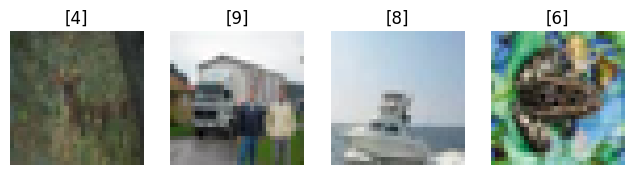

In [ ]:
index = [10, 16, 100, 200]
images = x_train[index]
lables = y_train[index]

plt.figure(figsize=(10, 10))

for i in range(len(index)):
  plt.subplot(1, 5, i+1) # the i + 1 is for placing the images in the plot grid serially
  plt.imshow(images[i], cmap="YlGn")
  plt.title(lables[i], fontsize=12)
  plt.axis("off")

plt.show()

In [ ]:
# building a sequential model

# input layer will 28 x 28 = 784, we cant send a 2d array, so our input layer will have 784 neurons
# output will have 10

# reshaping the train and test images according to dimension of a single image to a single 1D arra
input_size = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
print(input_size)

3072


In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

x_train.shape, y_train.shape, x_test.shape

((50000, 3072), (50000, 1), (10000, 3072))

In [ ]:
# scaling/normalizing the images

x_train = x_train/255
x_test = x_test/255

In [ ]:
# One hot encoding the labels because we are using categorical cross entropy as the loss function, so it needs the
# label to be one hot encoded.

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
model = Sequential([
    Dense(1500, activation="relu", input_dim = input_size),
    Dense(700, activation="relu"),
    Dropout(0.2),
    Dense(400, activation="relu"),
    Dropout(0.2),
    Dense(200, activation="relu"),
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="softmax"),
])

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                     │ (None, 1500)                │       4,609,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 700)                 │       1,050,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 400)                 │         280,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,046,460 (23.07 MB)

 Trainable params: 6,046,460 (23.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=100)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1950 - loss: 2.1326
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3461 - loss: 1.8061
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3865 - loss: 1.6973
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4173 - loss: 1.6389
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4346 - loss: 1.5680
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4465 - loss: 1.5416
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4567 - loss: 1.5106
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4732 - loss: 1.4644
Epoch 9/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4848 - loss: 1.4424
Epoch 10/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4885 - loss: 1.4234
Epoch 11/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4955 - loss: 1.4033
Epoch 12/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5117 - loss: 1.4449
0.5109999775886536
1.4490423202514648
